# EDA

## Marta ---------------------------------------------------------

put all of your code between here and the next person's name only

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
noaa_data = pd.read_csv('data/noaa_data_clean.csv', index_col= False)

In [3]:
noaa_data.columns

Index(['statecode', 'division', 'yearmonth', 'pcp', 'tavg', 'pdsi', 'phdi',
       'zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
       'sp12', 'sp24', 'tmin', 'tmax', 'state', 'month', 'year'],
      dtype='object')

In [4]:
noaa_data.describe()

,statecode,division,yearmonth,pcp,tavg,pdsi,phdi,zndx,pmdi,cdd,...,sp02,sp03,sp06,sp09,sp12,sp24,tmin,tmax,month,year
count,15773.000000,15773.0,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,...,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000
mean,29.011983,0.0,196031.220250,1.798108,49.823100,-0.042626,-0.007612,-0.009817,-0.009464,71.745261,...,0.002406,0.002114,0.001143,0.000399,-0.000359,-0.005024,37.003638,62.635346,6.494453,1960.247258
std,28.923192,0.0,3449.611004,1.573904,15.389533,2.594346,2.720131,1.912373,2.578275,132.719848,...,0.994421,0.997021,0.997939,0.999281,1.000042,1.004099,13.798940,17.259781,3.451530,34.496189
min,2.000000,0.0,190101.000000,0.000000,-3.900000,-9.090000,-9.090000,-7.140000,-9.090000,0.000000,...,-3.090000,-3.090000,-3.090000,-3.090000,-3.090000,-3.090000,-15.100000,6.700000,1.000000,1901.000000
25%,5.000000,0.0,193011.000000,0.690000,37.600000,-1.870000,-2.060000,-1.350000,-1.810000,0.000000,...,-0.670000,-0.680000,-0.680000,-0.670000,-0.660000,-0.670000,26.600000,49.000000,3.000000,1930.000000
50%,26.000000,0.0,196009.000000,1.430000,49.700000,-0.210000,-0.440000,-0.170000,-0.060000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.800000,62.900000,6.000000,1960.000000
75%,35.000000,0.0,199008.000000,2.450000,62.900000,1.720000,2.000000,1.130000,1.730000,78.000000,...,0.680000,0.660000,0.680000,0.670000,0.680000,0.650000,48.100000,77.600000,9.000000,1990.000000
max,110.000000,0.0,202010.000000,16.610000,84.100000,12.510000,12.510000,10.030000,12.510000,788.000000,...,3.090000,3.090000,3.090000,3.090000,3.090000,3.090000,68.800000,99.300000,12.000000,2020.000000


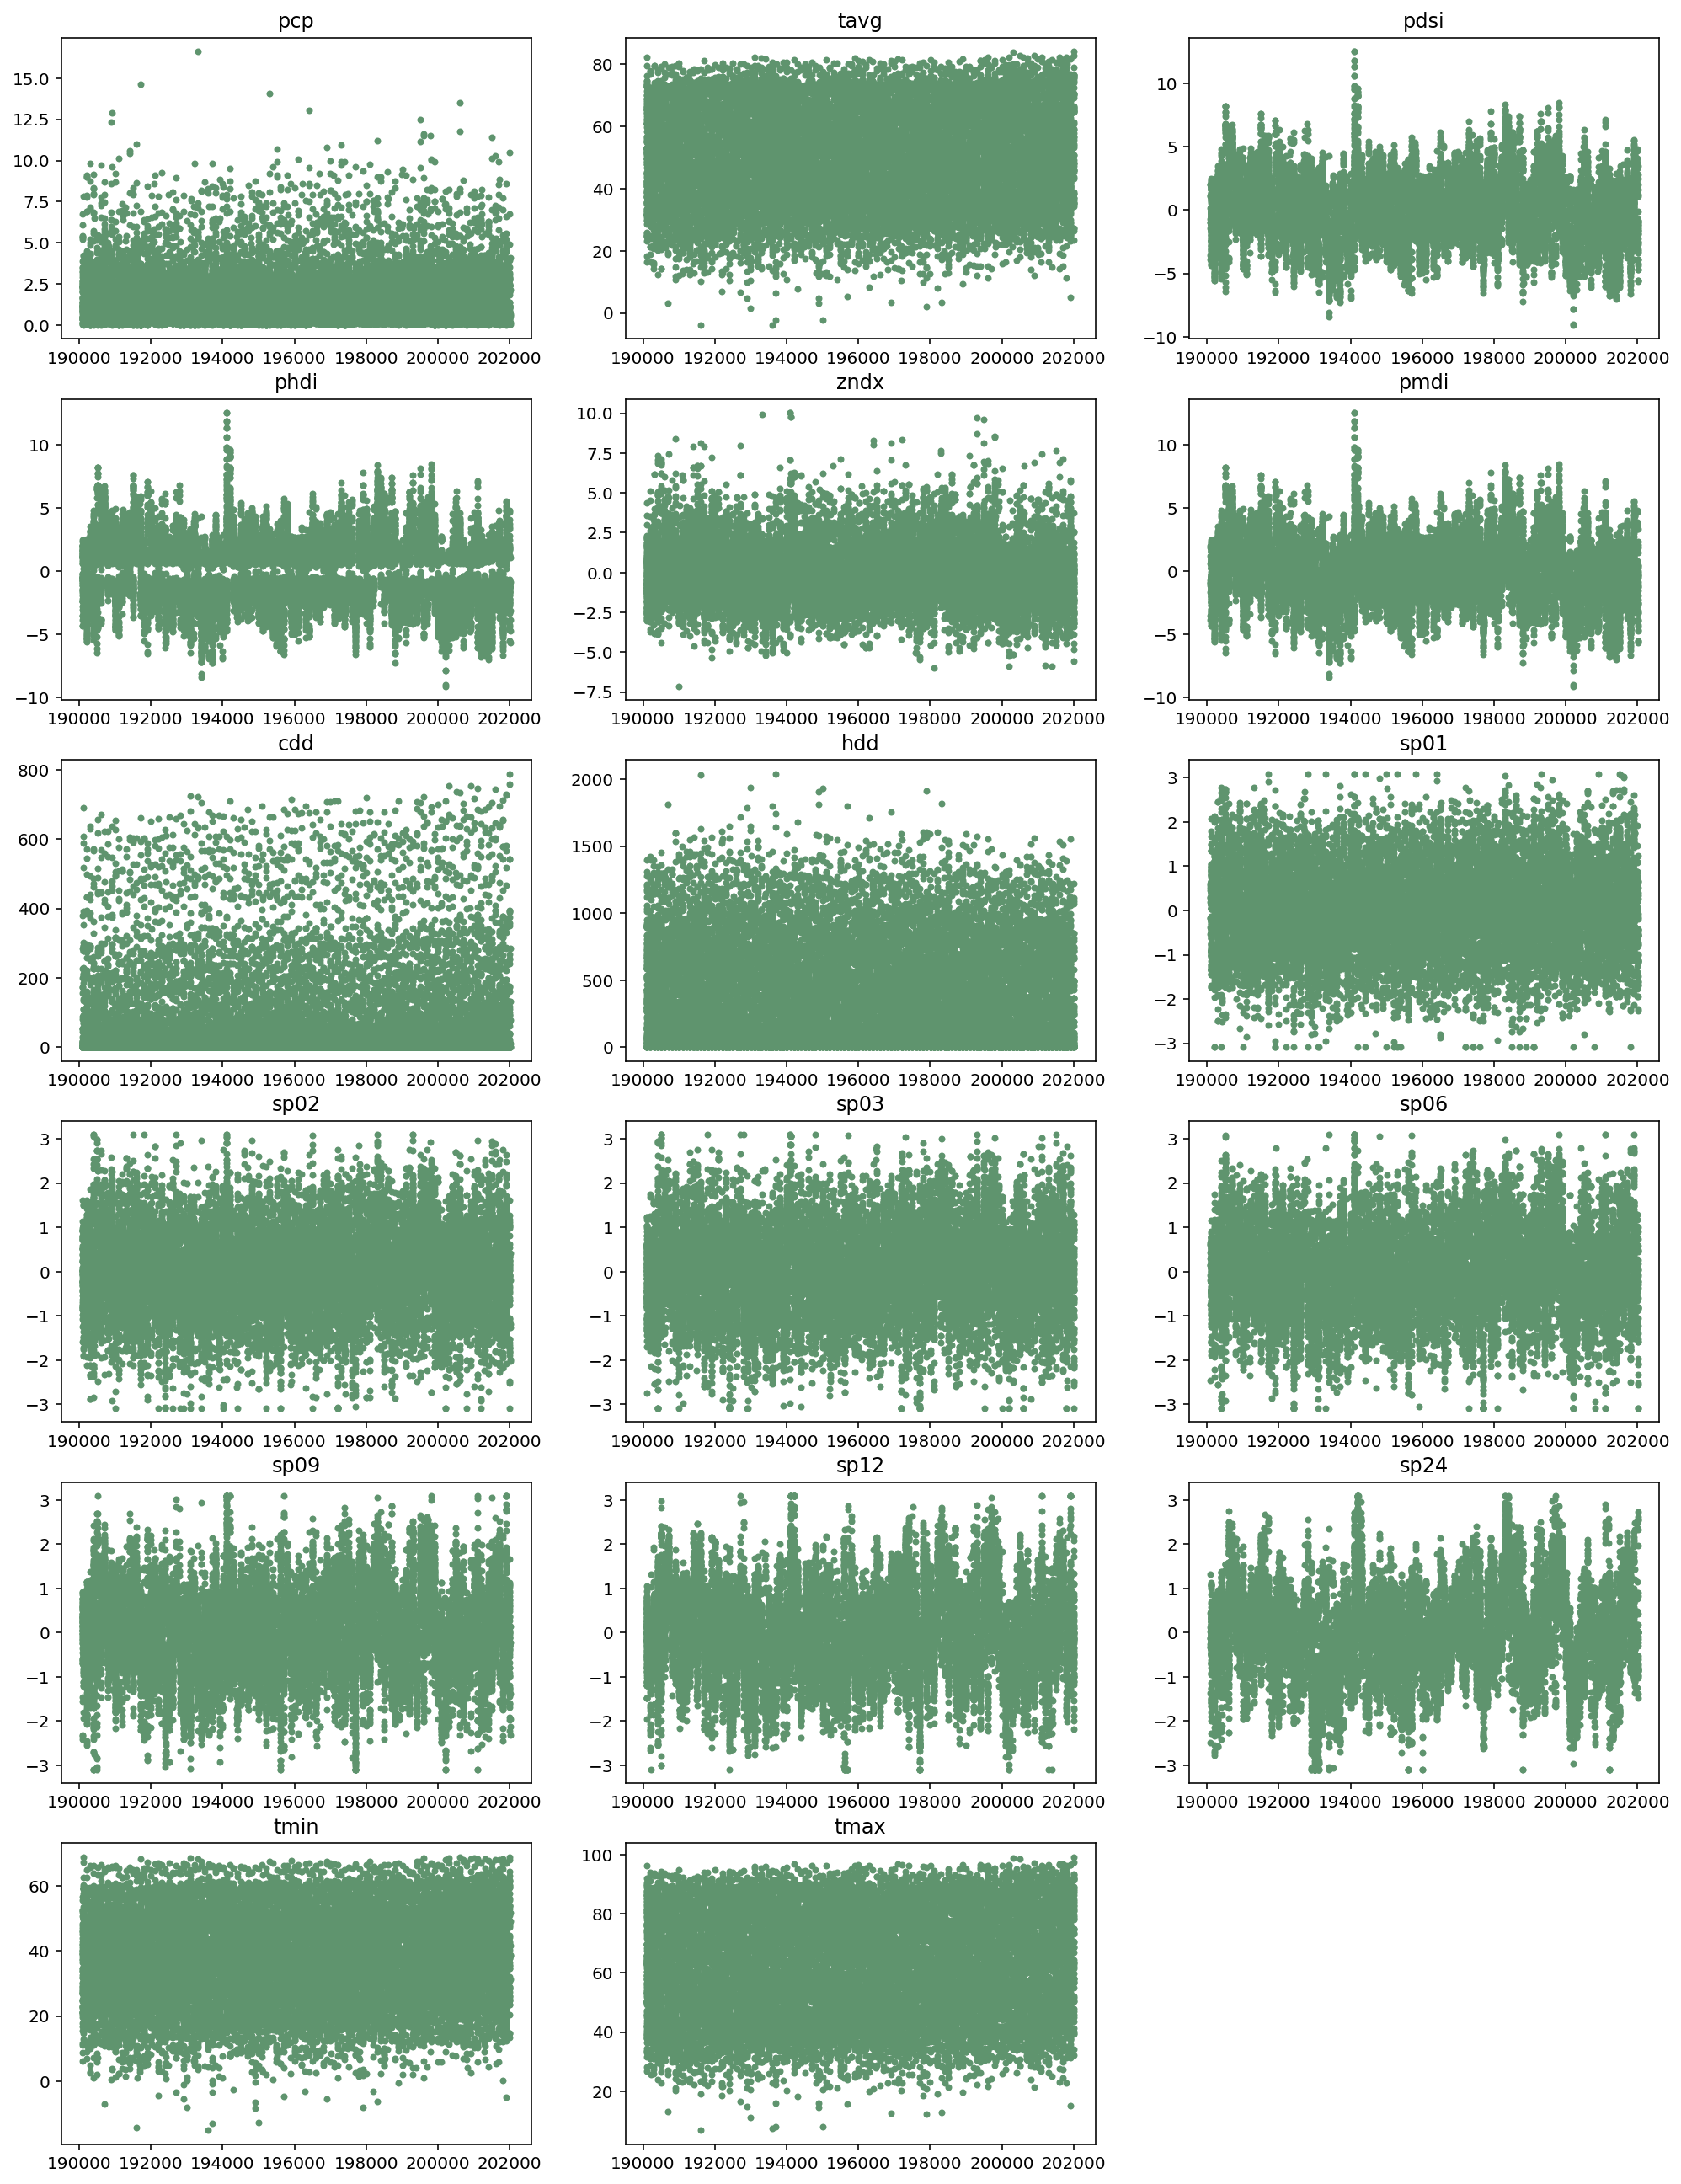

In [5]:
climate_cols = ['pcp', 'tavg', 'pdsi', 'phdi','zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
               'sp12', 'sp24', 'tmin', 'tmax']

plt.figure(figsize=(17,23))
for i in range(len(climate_cols)):
    plt.subplot(6,3,i+1)
    plt.scatter(noaa_data['yearmonth'], noaa_data[climate_cols[i]], color = '#5f946e', marker = '.')
    plt.title(f"{climate_cols[i]}")
    
plt.savefig('./visuals/climate_scatters.png')

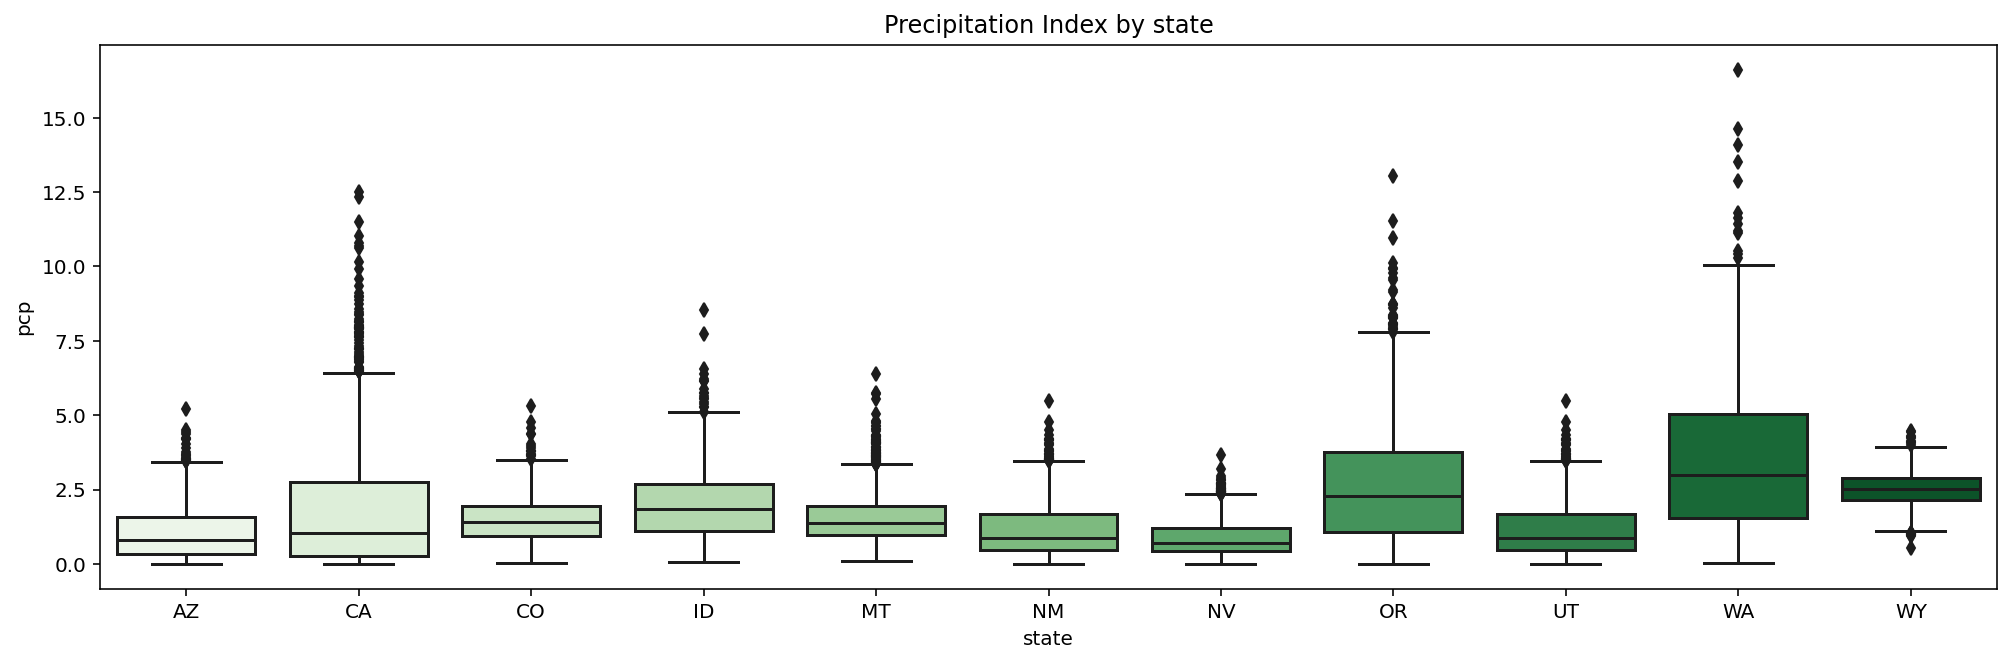

In [6]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'pcp', palette= 'Greens')
plt.title('Precipitation Index by state');
plt.savefig('./visuals/pcp_by_state.png')

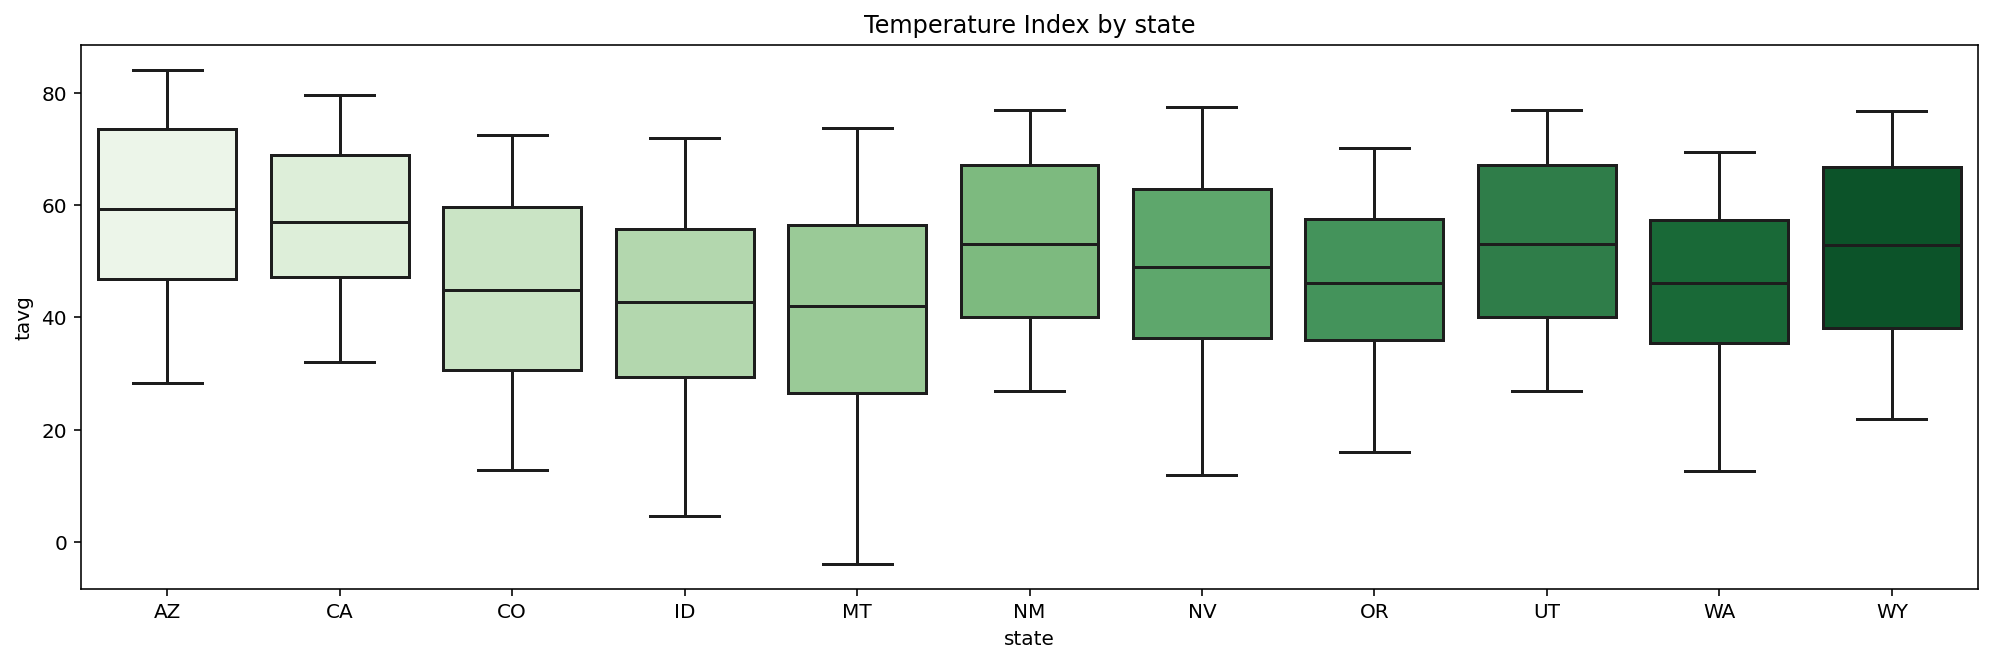

In [7]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'tavg', palette= 'Greens')
plt.title('Temperature Index by state');
plt.savefig('./visuals/tavg_by_state.png')

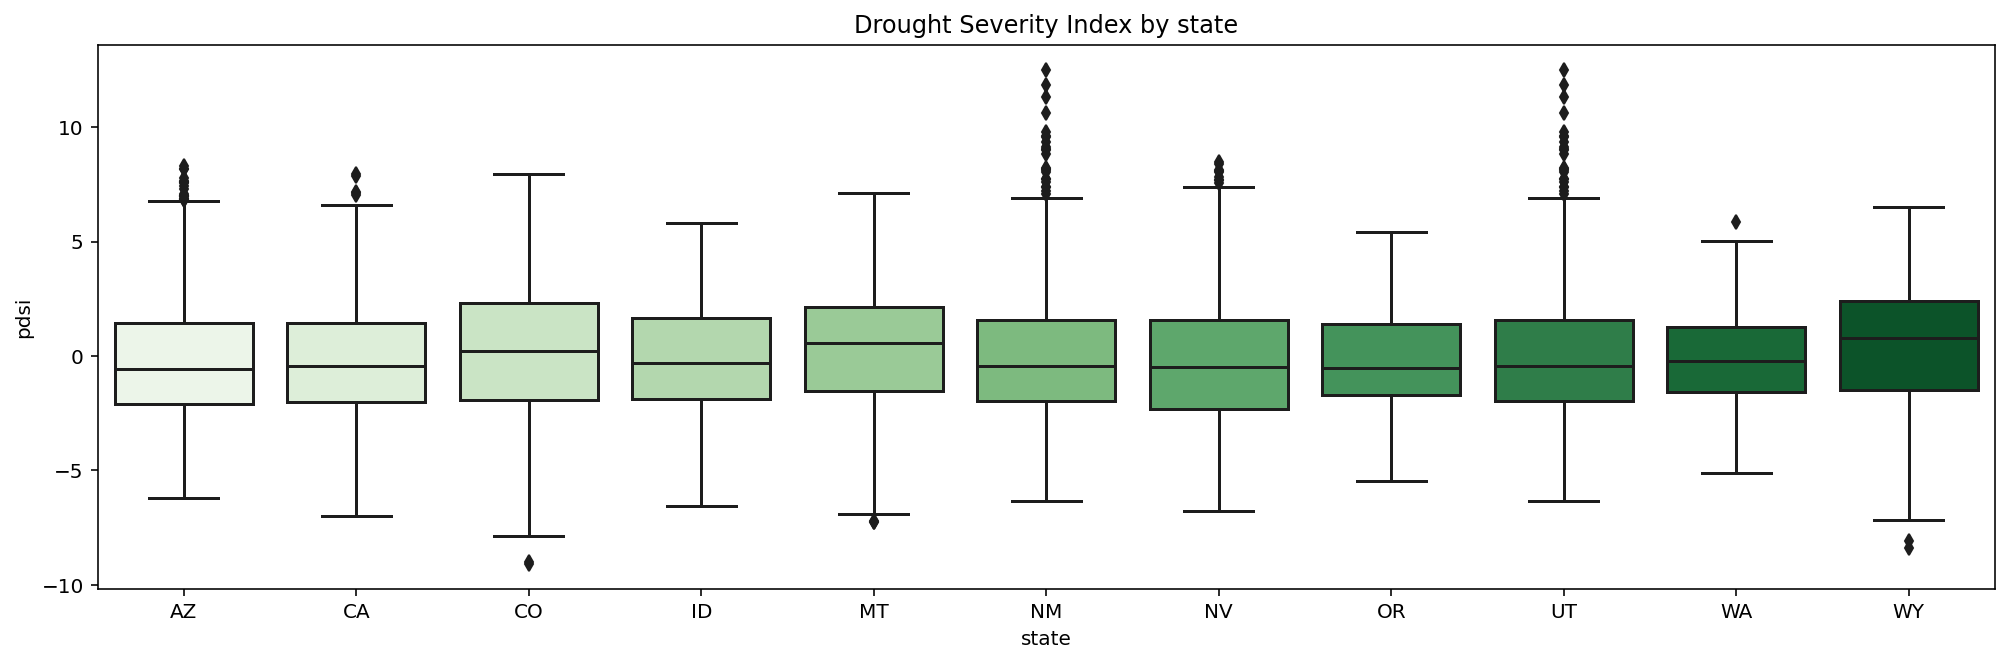

In [8]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'pdsi', palette= 'Greens')
plt.title('Drought Severity Index by state');
plt.savefig('./visuals/pdsi_by_state.png')

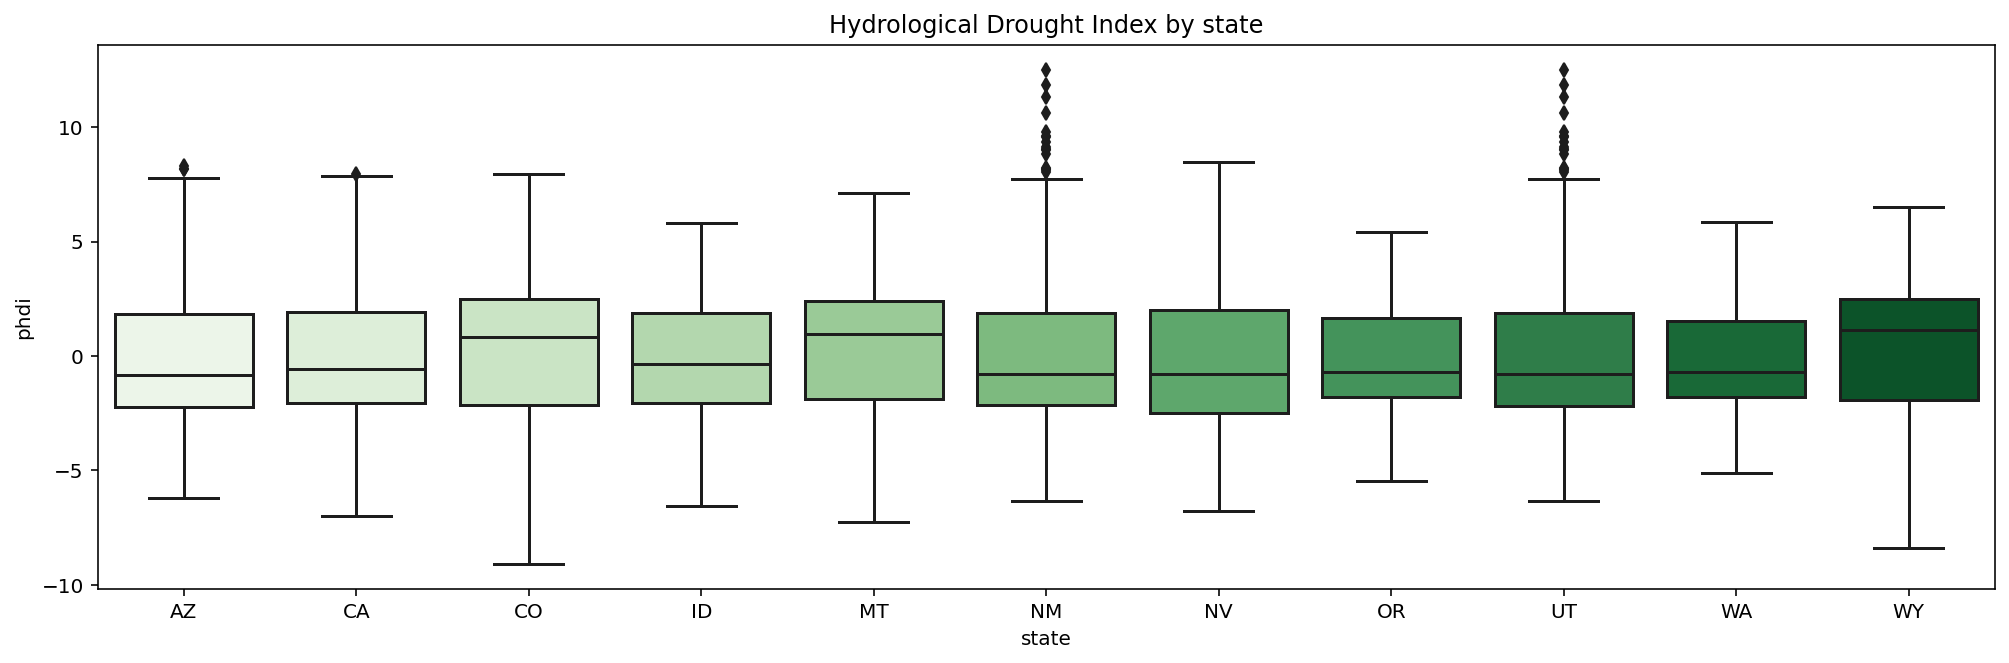

In [9]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'phdi', palette= 'Greens')
plt.title('Hydrological Drought Index by state');
plt.savefig('./visuals/phdi_by_state.png')

In [10]:
tmax_yr = noaa_data.groupby('year')['tmax'].mean().to_dict()
noaa_data['avg_yr_tmax'] = noaa_data['year'].apply(lambda x: tmax_yr[x])

tmin_yr = noaa_data.groupby('year')['tmin'].mean().to_dict()
noaa_data['avg_yr_tmin'] = noaa_data['year'].apply(lambda x: tmin_yr[x])

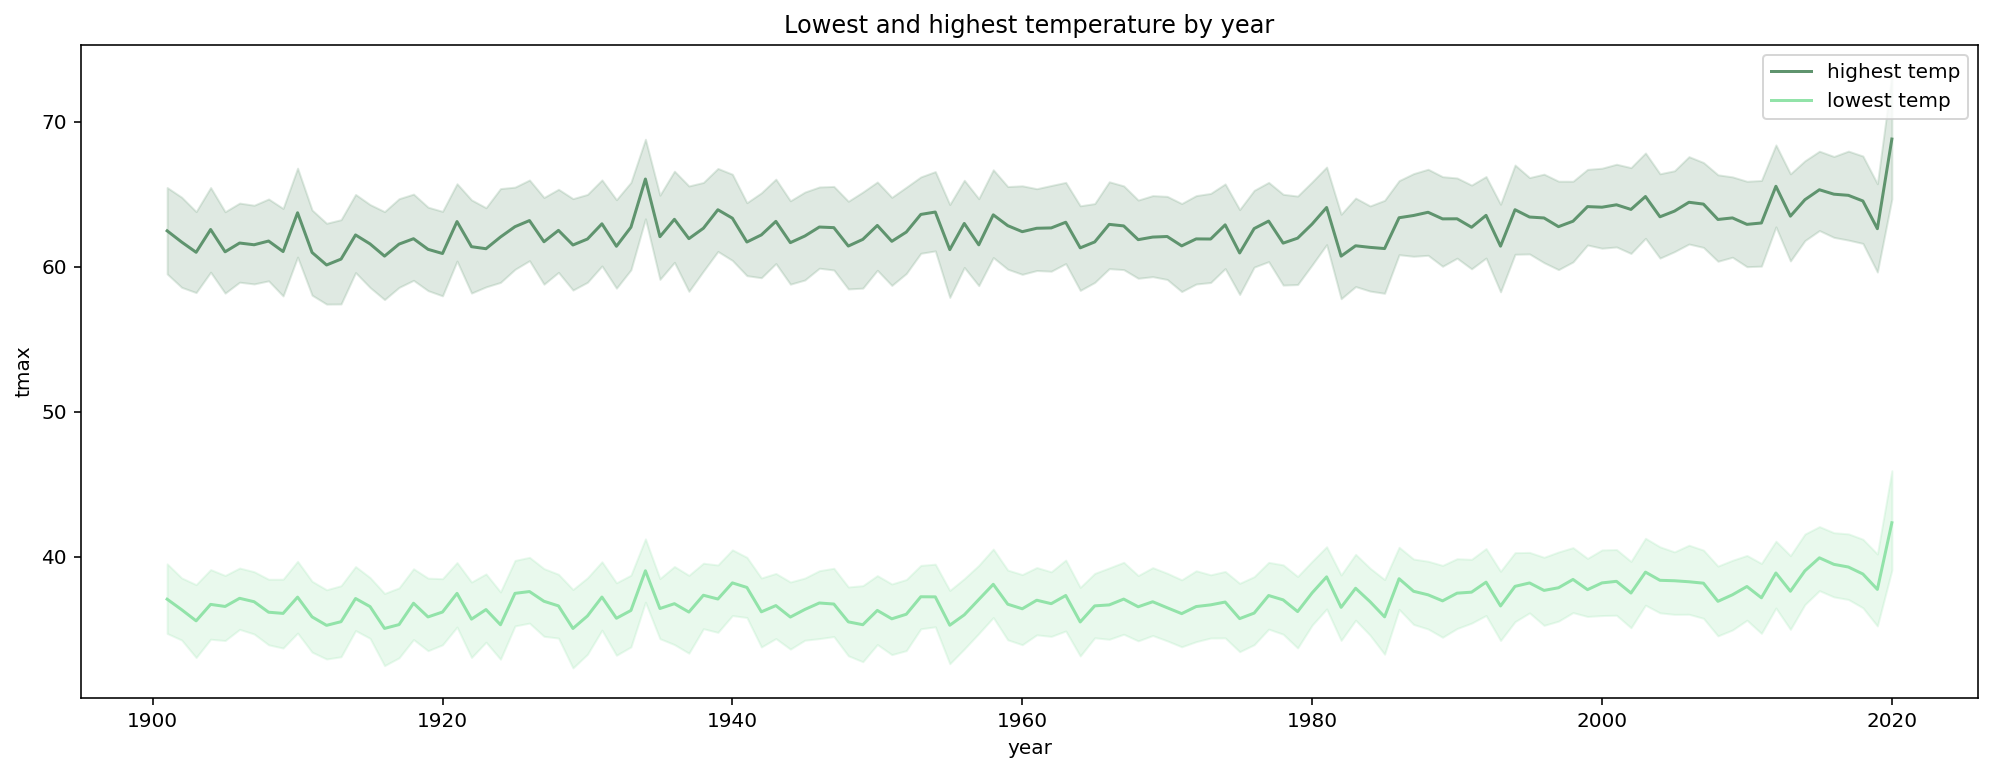

In [11]:
plt.figure(figsize = (17,6))
sns.lineplot(data = noaa_data, x = 'year', y = 'tmax', color = '#5f946e', label = 'highest temp')
sns.lineplot(data = noaa_data, x = 'year', y = 'tmin', color = '#92e3a9', label = 'lowest temp')
plt.title('Lowest and highest temperature by year')
plt.legend();
plt.savefig('min_max_tmp_yr.png')

In [12]:
noaa_data.tail()

,statecode,division,yearmonth,pcp,tavg,pdsi,phdi,zndx,pmdi,cdd,...,sp09,sp12,sp24,tmin,tmax,state,month,year,avg_yr_tmax,avg_yr_tmin
15768,110,0,202006,2.74,70.29,2.81,2.81,-0.88,2.32,242,...,0.94,0.83,2.56,57.51,83.05,WY,6,2020,68.801385,42.330923
15769,110,0,202007,2.94,75.65,2.47,2.47,-0.15,1.87,395,...,0.53,0.89,2.73,62.89,88.39,WY,7,2020,68.801385,42.330923
15770,110,0,202008,2.41,74.70,1.65,1.65,-1.69,0.38,351,...,0.61,0.75,2.54,61.54,87.84,WY,8,2020,68.801385,42.330923
15771,110,0,202009,2.40,65.97,1.24,1.24,-0.73,-0.28,176,...,0.49,0.73,2.32,53.01,78.89,WY,9,2020,68.801385,42.330923
15772,110,0,202010,2.16,54.36,1.09,1.09,-0.06,-0.39,79,...,0.14,0.29,1.96,41.65,67.06,WY,10,2020,68.801385,42.330923


## Jesse ---------------------------------------------------------

put all of your code between here and the next person's name only

In [1]:
import sqlite3
import pandas as pd
from urllib.request import urlopen
import json
import pandas as pd
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.graph_objects as go

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [2]:
fire_map = pd.read_pickle('./data/fire_pickle.pkl')

In [3]:
states_of_interest = ['CA','WA','OR','NV','AZ','NM','UT', 'CO', 'WY', 'ID', 'MT']

fire_map = fire_map[fire_map['STATE'].isin(states_of_interest)]

fire_map['STATE']=fire_map['STATE'].replace({'CA': '06', 
                       'WA': '53',
                      'OR': '41',
                      'NV': '32',
                      'AZ': '04',
                      'NM': '35',
                      'UT': '49',
                      'CO': '08',
                      'WY': '56',
                      'ID': '16',
                      'MT': '30',
                      })

fire_map['combined_fips'] =  fire_map['STATE'] + fire_map['FIPS_CODE']

In [4]:
wildfire = fire_map.groupby(['combined_fips']).agg({'FIRE_SIZE': ['count']})

wildfire['FIPS_CODE'] = wildfire.index

wildfire.columns = ["FIPS_CODE", "FIRE_SIZE"]

wildfire.reset_index()

,combined_fips,FIPS_CODE,FIRE_SIZE
0,04001,1162,04001
1,04003,1723,04003
2,04005,7900,04005
3,04007,1472,04007
4,04009,495,04009
...,...,...,...
323,53069,46,53069
324,53071,69,53071
325,53073,396,53073
326,53075,4,53075


In [5]:
wildfire_map = wildfire[['FIPS_CODE', 'count']]


fig = px.choropleth(wildfire_map, 
                    geojson=counties,
                    locations='FIPS_CODE',
                    color='count',
                           color_continuous_scale="Viridis",
                           range_color=(100, 6000),
                           scope="usa",
                           labels={'FIRE_SIZE':'FIRE_COUNT'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

KeyError: "['count'] not in index"

## CM ---------------------------------------------------------

put all of your code between here and the next person's name only

## Kira ---------------------------------------------------------

put all of your code between here and the next person's name only